In [1]:
# For description, see technical paper #29 ay https://mltechniques.com/resources/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
#--- [1] read data and only keep features and observations we want

#- [1.1] utility functions

def string_to_numbers(string):

    string = string.replace("[", "")
    string = string.replace("]", "")
    string = string.replace(" ", "")
    arr = string.split(',')
    arr = [eval(i) for i in arr]
    return(arr)

In [3]:
def category_to_integer(category):
    if category == 'Yes':
        integer = 1
    elif category == 'No':
        integer = 0
    else:
        integer = 2
    return(integer)

In [4]:
#- [1.2] read data
df = pd.read_csv(r'C:\Users\kkbha\Python\Python 07_data_exploration\data\Zomato1.csv') 
df_country = pd.read_excel(r'C:\Users\kkbha\Python\Python 07_data_exploration\data\Country-Code.xlsx')
merged_df = pd.merge(df, df_country, on='Country Code', how='inner')
merged_df = merged_df[(merged_df['Country'] == 'India') & (merged_df['Currency'] == 'Indian Rupees(Rs.)')]
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8652 entries, 624 to 9275
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         8652 non-null   int64  
 1   Restaurant Name       8652 non-null   object 
 2   Country Code          8652 non-null   int64  
 3   City                  8652 non-null   object 
 4   Address               8652 non-null   object 
 5   Locality              8652 non-null   object 
 6   Locality Verbose      8652 non-null   object 
 7   Longitude             8652 non-null   float64
 8   Latitude              8652 non-null   float64
 9   Cuisines              8652 non-null   object 
 10  Average Cost for two  8652 non-null   int64  
 11  Currency              8652 non-null   object 
 12  Has Table booking     8652 non-null   object 
 13  Has Online delivery   8652 non-null   object 
 14  Is delivering now     8652 non-null   object 
 15  Switch to order menu  86

In [5]:
merged_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [6]:
merged_df.count()

Restaurant ID           8652
Restaurant Name         8652
Country Code            8652
City                    8652
Address                 8652
Locality                8652
Locality Verbose        8652
Longitude               8652
Latitude                8652
Cuisines                8652
Average Cost for two    8652
Currency                8652
Has Table booking       8652
Has Online delivery     8652
Is delivering now       8652
Switch to order menu    8652
Price range             8652
Aggregate rating        8652
Rating color            8652
Rating text             8652
Votes                   8652
Country                 8652
dtype: int64

In [7]:
merged_df.rename(columns={'Average Cost for two': 'AverageCostfortwo','Aggregate rating': 'Aggregaterating','Price range': 'Pricerange','Country Code': 'CountryCode'}, inplace=True)


In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8652 entries, 624 to 9275
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         8652 non-null   int64  
 1   Restaurant Name       8652 non-null   object 
 2   CountryCode           8652 non-null   int64  
 3   City                  8652 non-null   object 
 4   Address               8652 non-null   object 
 5   Locality              8652 non-null   object 
 6   Locality Verbose      8652 non-null   object 
 7   Longitude             8652 non-null   float64
 8   Latitude              8652 non-null   float64
 9   Cuisines              8652 non-null   object 
 10  AverageCostfortwo     8652 non-null   int64  
 11  Currency              8652 non-null   object 
 12  Has Table booking     8652 non-null   object 
 13  Has Online delivery   8652 non-null   object 
 14  Is delivering now     8652 non-null   object 
 15  Switch to order menu  86

In [9]:
numeric_df = merged_df.select_dtypes(include='number')
numeric_df.info()
data = numeric_df
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8652 entries, 624 to 9275
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant ID      8652 non-null   int64  
 1   CountryCode        8652 non-null   int64  
 2   Longitude          8652 non-null   float64
 3   Latitude           8652 non-null   float64
 4   AverageCostfortwo  8652 non-null   int64  
 5   Pricerange         8652 non-null   int64  
 6   Aggregaterating    8652 non-null   float64
 7   Votes              8652 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 608.3 KB
<class 'pandas.core.frame.DataFrame'>
Index: 8652 entries, 624 to 9275
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant ID      8652 non-null   int64  
 1   CountryCode        8652 non-null   int64  
 2   Longitude          8652 non-null   float64
 3   Latitude         

In [10]:
#data = pd.read_csv(url)
features = ['AverageCostfortwo', 'Pricerange', 'Aggregaterating','Votes'] 
#data['Churn'] = data['Churn'].map(category_to_integer) 
#data['TotalCharges'].replace(' ', np.nan, inplace=True)
#data.dropna(subset=['TotalCharges'], inplace=True)  # remove missing data
print(data.head()) 
print (data.shape)
print (data.columns)

     Restaurant ID  CountryCode  Longitude   Latitude  AverageCostfortwo  \
624        3400025            1  78.011544  27.161661                850   
625        3400341            1   0.000000   0.000000                700   
626        3400005            1  78.011608  27.160832                500   
627        3400021            1  77.998092  27.195928                400   
628        3400017            1  78.007553  27.201725               1000   

     Pricerange  Aggregaterating  Votes  
624           3              3.9    140  
625           2              3.5     71  
626           2              3.6     94  
627           2              4.0     87  
628           3              4.2    177  
(8652, 8)
Index(['Restaurant ID', 'CountryCode', 'Longitude', 'Latitude',
       'AverageCostfortwo', 'Pricerange', 'Aggregaterating', 'Votes'],
      dtype='object')


In [11]:
#- [1.3] transforming TotalCharges to TotalChargeResidues, add to dataframe

# arr1 = data['tenure'].to_numpy()
# arr2 = data['TotalCharges'].to_numpy() 
# arr2 = arr2.astype(float)
# residues = arr2 - arr1 * np.sum(arr2) / np.sum(arr1)  # also try arr2/arr1
# data['TotalChargeResidues'] = residues

In [12]:
#- [1.4] set seed for replicability

pd.core.common.random_state(None)
seed = 105
np.random.seed(seed)

In [13]:
#- [1.5] initialize hyperparameters (bins_per_feature), select features

features = ['AverageCostfortwo', 'Pricerange', 'Aggregaterating','Votes'] 
bins_per_feature = [50, 4, 40, 40]   

In [14]:
bins_per_feature = np.array(bins_per_feature).astype(int)
data = data[features]
print(data.head())
print (data.shape)
print (data.columns)
data.info()

     AverageCostfortwo  Pricerange  Aggregaterating  Votes
624                850           3              3.9    140
625                700           2              3.5     71
626                500           2              3.6     94
627                400           2              4.0     87
628               1000           3              4.2    177
(8652, 4)
Index(['AverageCostfortwo', 'Pricerange', 'Aggregaterating', 'Votes'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 8652 entries, 624 to 9275
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AverageCostfortwo  8652 non-null   int64  
 1   Pricerange         8652 non-null   int64  
 2   Aggregaterating    8652 non-null   float64
 3   Votes              8652 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 338.0 KB


In [15]:
#- [1.6] split real dataset into training and validation sets

data_training = data.sample(frac = 0.5)
data_validation = data.drop(data_training.index)
data_training.to_csv('zomato_training_vg2.csv')
data_validation.to_csv('zomato_validation_vg2.csv')

nobs = len(data_training)
n_features = len(features)
eps = 0.0000000001 

In [16]:
#--- [2] create synthetic data  

#- [2.1] create quantile table pc_table2, one row for each feature

pc_table2 = []
for k in range(n_features):
    label = features[k]
    incr = 1 / bins_per_feature[k]   
    pc = np.arange(0, 1 + eps, incr)
    arr = np.quantile(data_training[label], pc, axis=0)
    pc_table2.append(arr)

In [17]:
#- [2.2] create/update bin for each obs [layer 1]
#        Faster implementation: replace 'while' loop by dichotomic search

npdata = pd.DataFrame.to_numpy(data_training[features])
bin_count = {}   # number of obs per bin
bin_obs = {}     # list of obs in each bin, separated by "~", stored as a string
for obs in npdata:
    key = [] 
    for k in range(n_features):
        idx = 0
        arr = pc_table2[k]    # percentiles for feature k
        while obs[k] >= arr[idx] and idx < bins_per_feature[k]: 
            idx = idx + 1
        idx = idx - 1  # lower bound for feature k in bin[key] attached to obs
        key.append(idx)
        skey = str(key)
    if skey in bin_count:
        bin_count[skey] += 1
        bin_obs[skey] += "~" + str(obs)
    else:
        bin_count[skey] = 1
        bin_obs[skey] = str(obs)

In [18]:
#- [2.3] generate nobs_synth observations (if mode = FixedCounts, nobs_synth = nobs)

def random_bin_counts(n, bin_count):
    # generate multinomial bin counts with same expectation as real counts
    pvals = []
    for skey in bin_count:
        pvals.append(bin_count[skey]/nobs)
    return(np.random.multinomial(n, pvals))

In [19]:
def get_obs_in_bin(bin_obs, skey): 
    # get list of observations (real data) in bin skey, also return median
    arr_obs = []
    arr_obs_aux = (bin_obs[skey]).split('~')
    for obs in arr_obs_aux:
        obs = ' '.join(obs.split())
        obs = obs.replace("[ ", "")
        obs = obs.replace("[", "")
        obs = obs.replace(" ]", "")
        obs = obs.replace("]", "")
        obs = obs.split(' ')
        obs = (np.array(obs)).astype(float)
        arr_obs.append(obs)
    arr_obs = np.array(arr_obs)
    median = np.median(arr_obs, axis = 0)
    return(arr_obs, median) 

In [20]:
mode = 'RandomCounts'  # (options: 'FixedCounts' or 'RandomCounts')
if mode == 'RandomCounts':
    nobs_synth = nobs 
    bin_count_random = random_bin_counts(nobs_synth, bin_count)
    ikey = 0

data_synth = []
bin_counter = 0

for skey in bin_count:

    if mode == 'FixedCounts':
        count = bin_count[skey]
    elif mode == 'RandomCounts': 
        count = bin_count_random[ikey]
        ikey += 1
    key = string_to_numbers(skey)
    L_bounds = []
    U_bounds = []
    bin_counter += 1

    for k in range(n_features):
        arr = pc_table2[k] 
        L_bounds.append(arr[key[k]])
        U_bounds.append(arr[1 + key[k]])

    # sample new synth obs (new_obs) in rectangular bin skey, uniformily
    # try other distrib, like multivariate Gaussian around bin median 
    # the list of real observations in bin[skey] is stored in obs_list (numpy array)
    # median is the vector of medians for all obs in bin skey

    obs_list, median = get_obs_in_bin(bin_obs, skey) # not used in this version
    
    for i in range(count):        
        new_obs = np.empty(n_features) # synthesized obs
        for k in range(n_features):
            new_obs[k] = np.random.uniform(L_bounds[k],U_bounds[k])
        data_synth.append(new_obs)

    str_median = str(["%8.2f" % number for number in median])
    str_median = str_median.replace("'","")
    print("bin ID = %5d | count = %5d | median = %s | bin key = %s" 
              %(bin_counter, bin_count[skey], str_median, skey))

data_synth = pd.DataFrame(data_synth, columns = features)

# apply floor function (not round) to categorical/ordinal features
data_synth['AverageCostfortwo'] = data_synth['AverageCostfortwo'].astype('int') 
data_synth['Votes'] = data_synth['Votes'].astype('int')

print(data_synth)    
data_synth.to_csv('zomato_synth_vg2.csv')


bin ID =     1 | count =     1 | median = [  900.00,     2.00,     4.20,    49.00] | bin key = [41, 3, 38, 24]
bin ID =     2 | count =     2 | median = [  800.00,     2.00,     3.90,   435.50] | bin key = [40, 3, 36, 37]
bin ID =     3 | count =     1 | median = [  550.00,     2.00,     3.10,    10.00] | bin key = [30, 3, 20, 14]
bin ID =     4 | count =    21 | median = [  500.00,     2.00,     0.00,     1.00] | bin key = [29, 3, 9, 6]
bin ID =     5 | count =     1 | median = [  250.00,     1.00,     2.80,     5.00] | bin key = [10, 1, 14, 11]
bin ID =     6 | count =     1 | median = [  500.00,     2.00,     2.60,     9.00] | bin key = [29, 3, 11, 13]
bin ID =     7 | count =     2 | median = [ 1100.00,     3.00,     3.60,   722.50] | bin key = [43, 3, 31, 38]
bin ID =     8 | count =     2 | median = [ 1500.00,     3.00,     4.20,  2589.50] | bin key = [46, 3, 38, 39]
bin ID =     9 | count =     4 | median = [  350.00,     1.00,     3.10,    12.00] | bin key = [18, 1, 20, 15]
bin

bin ID =  1371 | count =     1 | median = [  400.00,     1.00,     3.40,    13.00] | bin key = [22, 1, 27, 15]
bin ID =  1372 | count =     2 | median = [  700.00,     2.00,     2.90,    34.00] | bin key = [38, 3, 15, 22]
bin ID =  1373 | count =     1 | median = [ 1000.00,     3.00,     3.20,     8.00] | bin key = [43, 3, 22, 13]
bin ID =  1374 | count =     1 | median = [ 1800.00,     3.00,     2.40,    53.00] | bin key = [47, 3, 10, 25]
bin ID =  1375 | count =     1 | median = [  600.00,     2.00,     2.90,    90.00] | bin key = [34, 3, 15, 28]
bin ID =  1376 | count =     1 | median = [  650.00,     2.00,     3.10,   112.00] | bin key = [35, 3, 20, 30]
bin ID =  1377 | count =     3 | median = [  550.00,     2.00,     2.90,     4.00] | bin key = [30, 3, 15, 10]
bin ID =  1378 | count =     1 | median = [  600.00,     2.00,     3.20,   106.00] | bin key = [34, 3, 22, 30]
bin ID =  1379 | count =     1 | median = [  150.00,     1.00,     4.10,   158.00] | bin key = [4, 1, 37, 32]
bi

In [21]:
#--- [3] Evaluation synthetization using joint ECDF & Kolmogorov-Smirnov distance

# dataframes: df = synthetic; data = real data,
# compute multivariate ecdf on validation set, sort it by value (from 0 to 1) 

#- [3.1] compute ecdf on validation set (to later compare with that on synth data)

def compute_ecdf(dataframe, n_nodes, adjusted):

    # Monte-Carlo: sampling n_nodes locations (combos) for ecdf
    #    - adjusted correct for sparsity in high ecdf, but is sparse in low ecdf  
    #    - non-adjusted is the other way around
    # for faster computation: pre-compute percentiles for each feature
    # foe faster computation: optimize the computation of n_nodes SQL-like queries

    ecdf = {} 

    for point in range(n_nodes):

        if point % 100 == 0:
            print("sampling ecdf, location = %4d (adjusted = %s):" % (point, adjusted))
        combo = np.random.uniform(0, 1, n_features)
        if adjusted:
            combo = combo**(1/n_features)
        z = []   # multivariate quantile
        query_string = ""
        for k in range(n_features):
            label = features[k]
            dr = data_validation[label]
            percentile = combo[k] 
            z.append(eps + np.quantile(dr, percentile))
            if k == 0:
                query_string += "{} <= {}".format(label, z[k])
            else: 
                query_string += " and {} <= {}".format(label, z[k])

        countifs = len(data_validation.query(query_string))
        if countifs > 0: 
            ecdf[str(z)] = countifs / len(data_validation)
  
    ecdf = dict(sorted(ecdf.items(), key=lambda item: item[1]))

    # extract table with locations (ecdf argument) and ecdf values:
    #     - cosmetic change to return output easier to handle than ecdf 

    idx = 0
    arr_location = []
    arr_value = []
    for location in ecdf:
        value = ecdf[location]
        location = string_to_numbers(location)
        arr_location.append(location)
        arr_value.append(value)
        idx += 1

    print("\n")
    return(arr_location, arr_value)

In [22]:
n_nodes = 10000   # number of random locations in feature space, where ecdf is computed
reseed = False
if reseed:
   seed = 555
   np.random.seed(seed) 
arr_location1, arr_value1 = compute_ecdf(data_validation, n_nodes, adjusted = True)
arr_location2, arr_value2 = compute_ecdf(data_validation, n_nodes, adjusted = False)

sampling ecdf, location =    0 (adjusted = True):
sampling ecdf, location =  100 (adjusted = True):
sampling ecdf, location =  200 (adjusted = True):
sampling ecdf, location =  300 (adjusted = True):
sampling ecdf, location =  400 (adjusted = True):
sampling ecdf, location =  500 (adjusted = True):
sampling ecdf, location =  600 (adjusted = True):
sampling ecdf, location =  700 (adjusted = True):
sampling ecdf, location =  800 (adjusted = True):
sampling ecdf, location =  900 (adjusted = True):
sampling ecdf, location = 1000 (adjusted = True):
sampling ecdf, location = 1100 (adjusted = True):
sampling ecdf, location = 1200 (adjusted = True):
sampling ecdf, location = 1300 (adjusted = True):
sampling ecdf, location = 1400 (adjusted = True):
sampling ecdf, location = 1500 (adjusted = True):
sampling ecdf, location = 1600 (adjusted = True):
sampling ecdf, location = 1700 (adjusted = True):
sampling ecdf, location = 1800 (adjusted = True):
sampling ecdf, location = 1900 (adjusted = True):


sampling ecdf, location = 6300 (adjusted = False):
sampling ecdf, location = 6400 (adjusted = False):
sampling ecdf, location = 6500 (adjusted = False):
sampling ecdf, location = 6600 (adjusted = False):
sampling ecdf, location = 6700 (adjusted = False):
sampling ecdf, location = 6800 (adjusted = False):
sampling ecdf, location = 6900 (adjusted = False):
sampling ecdf, location = 7000 (adjusted = False):
sampling ecdf, location = 7100 (adjusted = False):
sampling ecdf, location = 7200 (adjusted = False):
sampling ecdf, location = 7300 (adjusted = False):
sampling ecdf, location = 7400 (adjusted = False):
sampling ecdf, location = 7500 (adjusted = False):
sampling ecdf, location = 7600 (adjusted = False):
sampling ecdf, location = 7700 (adjusted = False):
sampling ecdf, location = 7800 (adjusted = False):
sampling ecdf, location = 7900 (adjusted = False):
sampling ecdf, location = 8000 (adjusted = False):
sampling ecdf, location = 8100 (adjusted = False):
sampling ecdf, location = 8200 

In [23]:
#- [3.2] comparison: synthetic (based on training set) vs real (validation set)

def ks_delta(SyntheticData, locations, ecdf_ValidationSet):

    # SyntheticData is a dataframe
    # locations are the points in the feature space where ecdf is computed
    # for the validation set, ecdf values are stored in ecdf_ValidationSet
    # here we compute ecdf for the synthetic data, at the specified locations
    # output ks_max in [0, 1] with 0 = best, 1 = worst

    ks_max = 0
    ecdf_real = []
    ecdf_synth = []
    for idx in range(len(locations)):
        location = locations[idx]
        value = ecdf_ValidationSet[idx]
        query_string = ""
        for k in range(n_features):
            label = features[k]
            if k == 0:
                query_string += "{} <= {}".format(label, location[k])
            else: 
                query_string += " and {} <= {}".format(label, location[k])
        countifs = len(SyntheticData.query(query_string))
        synth_value = countifs / len(SyntheticData)
        ks = abs(value - synth_value)
        ecdf_real.append(value)
        ecdf_synth.append(synth_value)
        if ks > ks_max:
            ks_max = ks
        # print("location ID: %6d | ecdf_real: %6.4f | ecdf_synth: %6.4f"
        #             %(idx, value, synth_value))
    return(ks_max, ecdf_real, ecdf_synth)




In [24]:
df = pd.read_csv('zomato_synth_vg2.csv')
ks_max1, ecdf_real1, ecdf_synth1 = ks_delta(df, arr_location1, arr_value1)
ks_max2, ecdf_real2, ecdf_synth2 = ks_delta(df, arr_location2, arr_value2)
ks_max = max(ks_max1, ks_max2)
print("Test ECDF Kolmogorof-Smirnov dist. (synth. vs valid.): %6.4f" %(ks_max))

Test ECDF Kolmogorof-Smirnov dist. (synth. vs valid.): 0.5058


In [25]:
#- [3.3] comparison: training versus validation set

df = pd.read_csv('zomato_training_vg2.csv')
base_ks_max1, ecdf_real1, ecdf_synth1 = ks_delta(df, arr_location1, arr_value1)
base_ks_max2, ecdf_real2, ecdf_synth2 = ks_delta(df, arr_location2, arr_value2)
base_ks_max = max(base_ks_max1, base_ks_max2)
print("Base ECDF Kolmogorof-Smirnov dist. (train. vs valid.): %6.4f" %(base_ks_max))

Base ECDF Kolmogorof-Smirnov dist. (train. vs valid.): 0.0335


In [26]:
#--- [4] visualizations

def vg_scatter(df, feature1, feature2, counter):

    # customized plots, subplot position based on counter

    label = feature1 + " vs " + feature2
    x = df[feature1].to_numpy()
    y = df[feature2].to_numpy()
    plt.subplot(3, 2, counter)
    plt.scatter(x, y, s = 0.1, c ="blue")
    plt.xlabel(label, fontsize = 7)
    plt.xticks([])
    plt.yticks([])
    #plt.ylim(0,70000)
    #plt.xlim(18,64)
    return()

In [27]:
def vg_histo(df, feature, counter):

    # customized plots, subplot position based on counter

    y = df[feature].to_numpy()
    plt.subplot(2, 3, counter)
    min = np.min(y)
    max = np.max(y)
    binBoundaries = np.linspace(min, max, 30)
    plt.hist(y, bins=binBoundaries, color='white', align='mid',edgecolor='red',
              linewidth = 0.3) 
    plt.xlabel(feature, fontsize = 7)
    plt.xticks([])
    plt.yticks([])
    return()

()

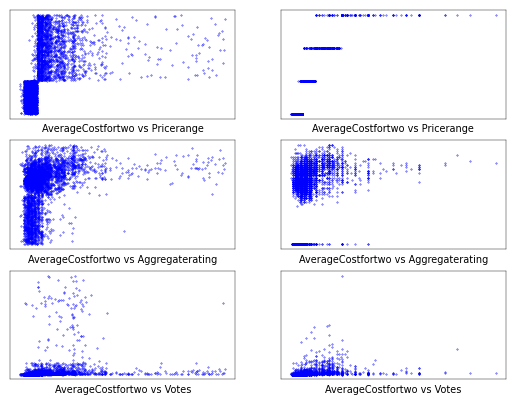

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 0.3
# features = ['AverageCostfortwo', 'Pricerange', 'Aggregaterating','Votes'] 
#- [4.1] scatterplots for Churn = 'No'

dfs = pd.read_csv('zomato_synth_vg2.csv')
dfv = pd.read_csv('zomato_validation_vg2.csv')
#dfs.drop(dfs[dfs['Churn'] == 0].index, inplace = True)
#dfv.drop(dfv[dfv['Churn'] == 0].index, inplace = True)

vg_scatter(dfs, 'AverageCostfortwo', 'Pricerange', 1)
vg_scatter(dfv, 'AverageCostfortwo', 'Pricerange', 2)
vg_scatter(dfs, 'AverageCostfortwo', 'Aggregaterating', 3)
vg_scatter(dfv, 'AverageCostfortwo', 'Aggregaterating', 4)
vg_scatter(dfs, 'AverageCostfortwo', 'Votes', 5)
vg_scatter(dfv, 'AverageCostfortwo', 'Votes', 6)

In [29]:
#import matplotlib.pyplot as plt
#import matplotlib as mpl
#mpl.rcParams['axes.linewidth'] = 0.3
# features = ['AverageCostfortwo', 'Pricerange', 'Aggregaterating','Votes'] 
#- [4.1] scatterplots for Churn = 'No'
#vg_scatter(dfs, 'tenure', 'MonthlyCharges', 1)
#vg_scatter(dfv, 'tenure', 'MonthlyCharges', 2)
#vg_scatter(dfs, 'tenure', 'TotalChargeResidues', 3)
#vg_scatter(dfv, 'tenure', 'TotalChargeResidues', 4)
#vg_scatter(dfs, 'MonthlyCharges', 'TotalChargeResidues', 5)
#vg_scatter(dfv, 'MonthlyCharges', 'TotalChargeResidues', 6)
#plt.show()

In [30]:
#- [4.2] scatterplots for Churn = 'Yes'

# dfs = pd.read_csv('telecom_synth_vg2.csv')
# dfs.drop(dfs[dfs['Churn'] == 1].index, inplace = True)
# dfv = pd.read_csv('telecom_validation_vg2.csv')
# dfv.drop(dfv[dfv['Churn'] == 1].index, inplace = True)

# vg_scatter(dfs, 'tenure', 'MonthlyCharges', 1)
# vg_scatter(dfv, 'tenure', 'MonthlyCharges', 2)
# vg_scatter(dfs, 'tenure', 'TotalChargeResidues', 3)
# vg_scatter(dfv, 'tenure', 'TotalChargeResidues', 4)
# vg_scatter(dfs, 'MonthlyCharges', 'TotalChargeResidues', 5)
# vg_scatter(dfv, 'MonthlyCharges', 'TotalChargeResidues', 6)
# plt.show()

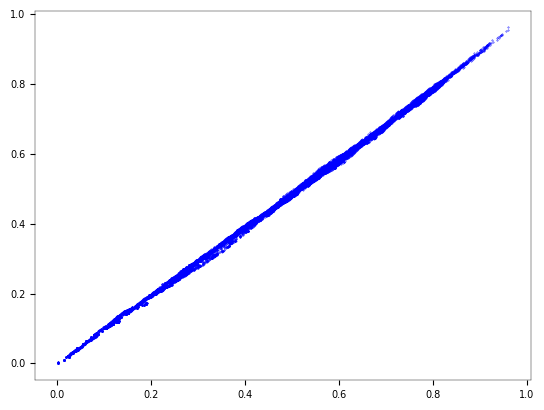

In [31]:
#- [4.3] ECDF scatterplot: validation set vs. synth data 

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.scatter(ecdf_real1, ecdf_synth1, s = 0.1, c ="blue")
plt.scatter(ecdf_real2, ecdf_synth2, s = 0.1, c ="blue")
plt.show()

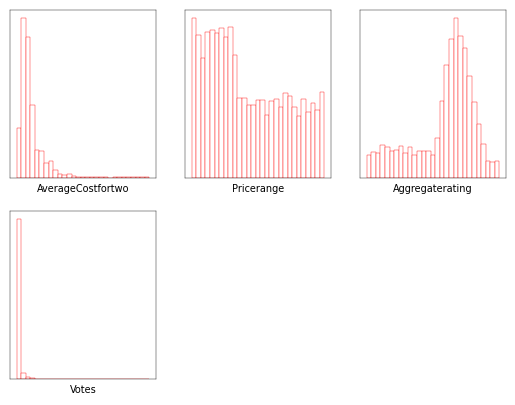

In [32]:
#- [4.4] histograms, Churn = 'No'
# features = ['AverageCostfortwo', 'Pricerange', 'Aggregaterating','Votes']
dfs = pd.read_csv('zomato_synth_vg2.csv')
#dfs.drop(dfs[dfs['Churn'] == 0].index, inplace = True)
dfv = pd.read_csv('zomato_validation_vg2.csv')
#dfv.drop(dfv[dfv['Churn'] == 0].index, inplace = True)
vg_histo(dfs, 'AverageCostfortwo', 1)
vg_histo(dfs, 'Pricerange', 2)
vg_histo(dfs, 'Aggregaterating', 3)
vg_histo(dfv, 'Votes', 4)
#vg_histo(dfv, 'MonthlyCharges', 5)
# vg_histo(dfv, 'TotalChargeResidues', 6)
plt.show()

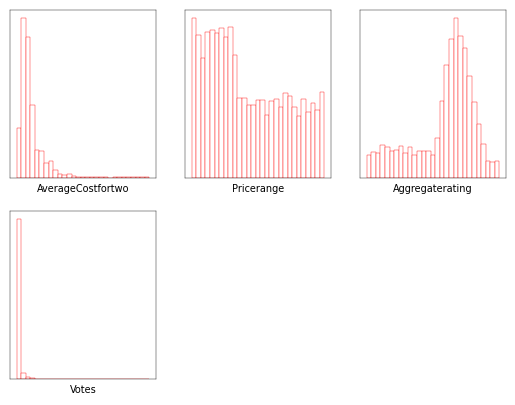

In [33]:
#- [4.5] histograms, Churn = 'Yes'
# features = ['AverageCostfortwo', 'Pricerange', 'Aggregaterating','Votes']

dfs = pd.read_csv('zomato_synth_vg2.csv')
#dfs.drop(dfs[dfs['Churn'] == 1].index, inplace = True)
dfv = pd.read_csv('zomato_validation_vg2.csv')
#dfv.drop(dfv[dfv['Churn'] == 1].index, inplace = True)
vg_histo(dfs, 'AverageCostfortwo', 1)
vg_histo(dfs, 'Pricerange', 2)
vg_histo(dfs, 'Aggregaterating', 3)
vg_histo(dfv, 'Votes', 4)
#vg_histo(dfv, 'MonthlyCharges', 5)
#vg_histo(dfv, 'TotalChargeResidues', 6)
plt.show()

In [34]:
df = pd.read_csv('zomato_synth_vg2.csv')
ks_max1, ecdf_real1, ecdf_synth1 = ks_delta(df, arr_location1, arr_value1)
ks_max2, ecdf_real2, ecdf_synth2 = ks_delta(df, arr_location2, arr_value2)
ks_max = max(ks_max1, ks_max2)
print("Test ECDF Kolmogorof-Smirnov dist. (synth. vs valid.): %6.4f" %(ks_max))

Test ECDF Kolmogorof-Smirnov dist. (synth. vs valid.): 0.5058


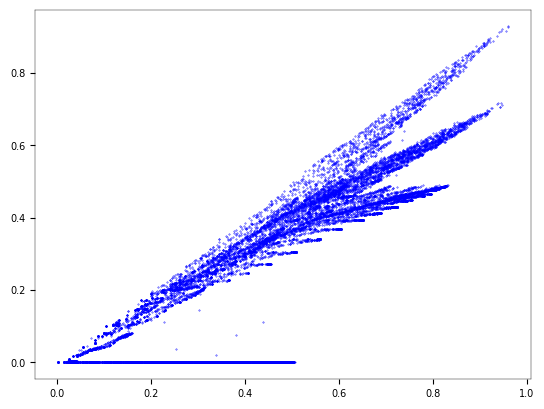

In [35]:
#- [4.3] ECDF scatterplot: validation set vs. synth data 

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.scatter(ecdf_real1, ecdf_synth1, s = 0.1, c ="blue")
plt.scatter(ecdf_real2, ecdf_synth2, s = 0.1, c ="blue")
plt.show()